In [6]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2020-08-07 04:15:55--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.217.128, 172.217.203.128, 108.177.11.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.217.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

inception_v3_weight 100%[===================>]  83.84M  28.4MB/s    in 3.0s    

2020-08-07 04:15:59 (28.4 MB/s) - ‘inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [7]:
import os
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

In [8]:
weights1="inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5"

In [9]:
pre_trained_model = InceptionV3(input_shape = (150, 150, 3), 
                                include_top = False, 
                                weights = None)

pre_trained_model.load_weights(weights1)

for layer in pre_trained_model.layers:
    layer.trainable = False

pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 150, 150, 3) 0                                            
__________________________________________________________________________________________________
conv2d_188 (Conv2D)             (None, 74, 74, 32)   864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization_188 (BatchN (None, 74, 74, 32)   96          conv2d_188[0][0]                 
__________________________________________________________________________________________________
activation_188 (Activation)     (None, 74, 74, 32)   0           batch_normalization_188[0][0]    
_______________________________________________________________________________________

In [10]:
last_layer = pre_trained_model.get_layer('mixed7')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 7, 7, 768)


In [11]:
from tensorflow.keras.optimizers import Adam

x = layers.Flatten()(last_output)

x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)                  
x = layers.Dense  (1, activation='sigmoid')(x)           

model = Model( pre_trained_model.input, x) 

model.compile(optimizer = Adam(lr=0.0001), 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy'])

In [12]:
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)


test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory("../input/dogs-cats-images/dataset/training_set/",
                                                    batch_size = 40,
                                                    class_mode = 'binary', 
                                                    target_size = (150, 150))     

validation_generator =  test_datagen.flow_from_directory( "../input/dogs-cats-images/dataset/test_set/",
                                                          batch_size  = 40,
                                                          class_mode  = 'binary', 
                                                          target_size = (150, 150))

Found 8000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [13]:
history = model.fit(
            train_generator,
            validation_data = validation_generator,
            steps_per_epoch = 100,
            epochs = 100,
            validation_steps = 50,
            verbose = 2)

Epoch 1/100
100/100 - 52s - loss: 0.2411 - accuracy: 0.8928 - val_loss: 0.0868 - val_accuracy: 0.9630
Epoch 2/100
100/100 - 43s - loss: 0.1799 - accuracy: 0.9280 - val_loss: 0.1056 - val_accuracy: 0.9585
Epoch 3/100
100/100 - 42s - loss: 0.1716 - accuracy: 0.9260 - val_loss: 0.0846 - val_accuracy: 0.9645
Epoch 4/100
100/100 - 42s - loss: 0.1488 - accuracy: 0.9365 - val_loss: 0.0959 - val_accuracy: 0.9615
Epoch 5/100
100/100 - 40s - loss: 0.1504 - accuracy: 0.9358 - val_loss: 0.1165 - val_accuracy: 0.9535
Epoch 6/100
100/100 - 40s - loss: 0.1422 - accuracy: 0.9362 - val_loss: 0.0805 - val_accuracy: 0.9715
Epoch 7/100
100/100 - 40s - loss: 0.1426 - accuracy: 0.9417 - val_loss: 0.0801 - val_accuracy: 0.9750
Epoch 8/100
100/100 - 39s - loss: 0.1331 - accuracy: 0.9460 - val_loss: 0.0787 - val_accuracy: 0.9705
Epoch 9/100
100/100 - 39s - loss: 0.1298 - accuracy: 0.9465 - val_loss: 0.0760 - val_accuracy: 0.9725
Epoch 10/100
100/100 - 39s - loss: 0.1198 - accuracy: 0.9503 - val_loss: 0.1050 - 

Epoch 81/100
100/100 - 39s - loss: 0.0721 - accuracy: 0.9737 - val_loss: 0.0694 - val_accuracy: 0.9770
Epoch 82/100
100/100 - 39s - loss: 0.0726 - accuracy: 0.9700 - val_loss: 0.0693 - val_accuracy: 0.9750
Epoch 83/100
100/100 - 39s - loss: 0.0679 - accuracy: 0.9728 - val_loss: 0.0759 - val_accuracy: 0.9770
Epoch 84/100
100/100 - 39s - loss: 0.0812 - accuracy: 0.9688 - val_loss: 0.0760 - val_accuracy: 0.9755
Epoch 85/100
100/100 - 40s - loss: 0.0769 - accuracy: 0.9693 - val_loss: 0.0759 - val_accuracy: 0.9760
Epoch 86/100
100/100 - 40s - loss: 0.0785 - accuracy: 0.9680 - val_loss: 0.0798 - val_accuracy: 0.9740
Epoch 87/100
100/100 - 40s - loss: 0.0664 - accuracy: 0.9747 - val_loss: 0.0728 - val_accuracy: 0.9755
Epoch 88/100
100/100 - 41s - loss: 0.0733 - accuracy: 0.9703 - val_loss: 0.0756 - val_accuracy: 0.9725
Epoch 89/100
100/100 - 40s - loss: 0.0670 - accuracy: 0.9728 - val_loss: 0.0755 - val_accuracy: 0.9765
Epoch 90/100
100/100 - 39s - loss: 0.0723 - accuracy: 0.9712 - val_loss: 

<Figure size 432x288 with 0 Axes>

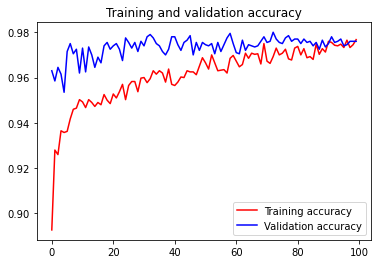

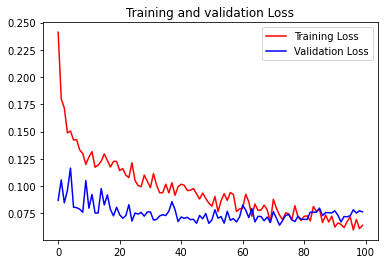

<Figure size 432x288 with 0 Axes>

In [19]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.legend(loc=0)
plt.figure()